In [1]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *

data_DIR = "../data/box/"
pbp_DIR = "../data/pbpdata/"
fig_DIR = "../figs/analysis/"

In [6]:
df1 = get_box("T","Base",False,range(1980,2025))

In [8]:
df1["w"] = df1["wl"] == "W"

In [38]:
df2 = df1.groupby(["team_name","season"])[["w"]].agg({"w":["sum","count"]})
df2 = df2.reset_index()
df2.columns = ["team_name","season","w","t"]
df2["w_pct"] = round(df2["w"]/df2["t"],2)
df2 = df2.sort_values(["season","w_pct"]).reset_index(drop=True)
df2["tank"] = df2["w_pct"] <0.3
df3 = df2.groupby(["season"])[["tank"]].agg({"tank":["sum","count"]})
df3 = df3.reset_index()
df3.columns = ["season","tank","total"]
df3["tank_pct"] = round(df3["tank"]/df3["total"],2)

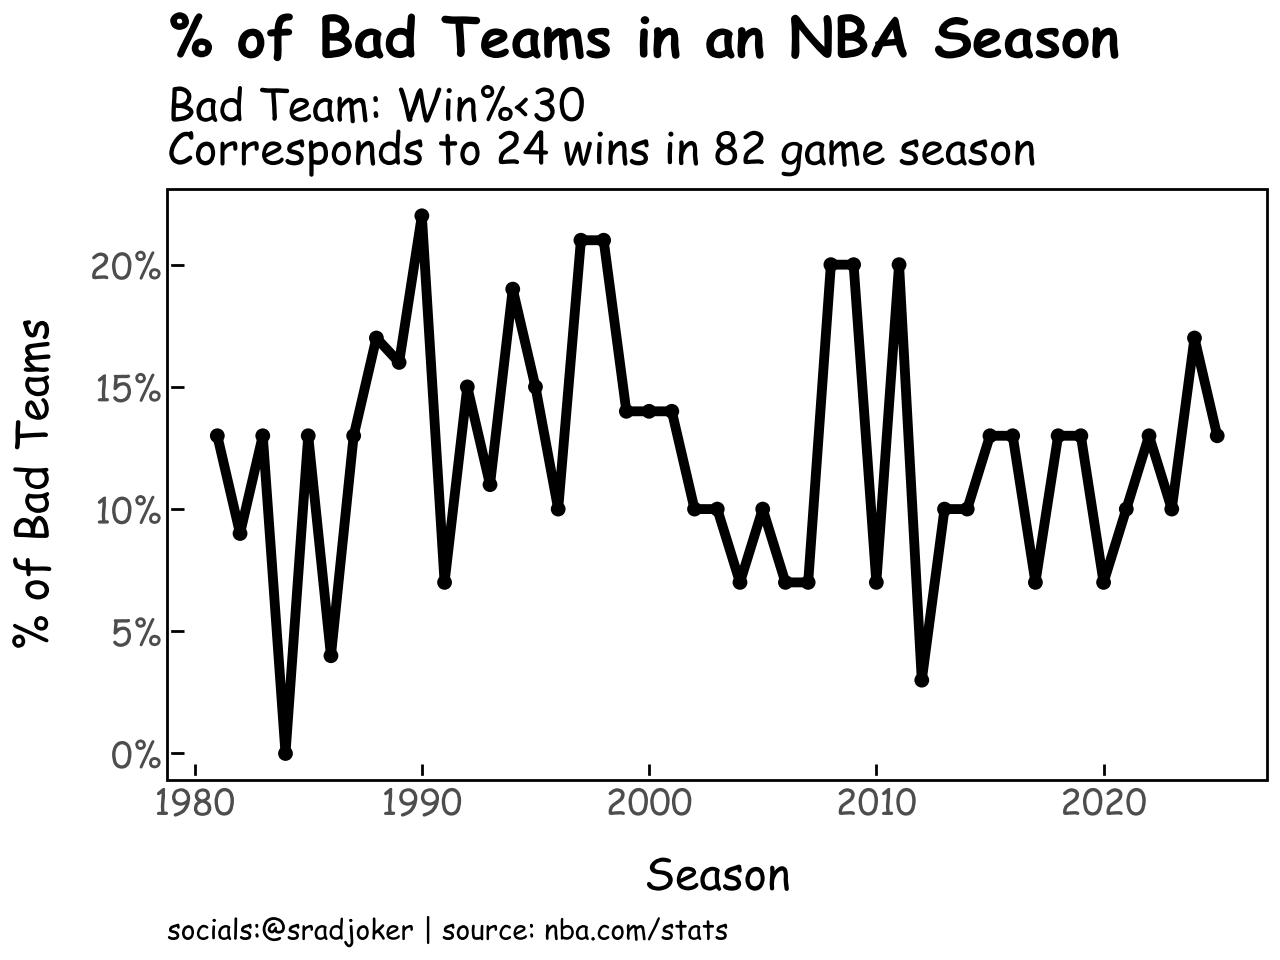

In [44]:
p = (
    ggplot(df3)
    + aes(x="season",y="tank_pct")
    + geom_line(size=2)
    + geom_point(size=2)
    + scale_y_continuous(labels=percent_format())
    + theme_idv
    + labs(
        title="% of Bad Teams in an NBA Season",
        subtitle="Bad Team: Win%<30\nCorresponds to 24 wins in 82 game season",
        y="% of Bad Teams",
        x="Season"
    )
    +pnba
)
p

In [45]:
df3

,season,tank,total,tank_pct
0,1981,3,23,0.13
1,1982,2,23,0.09
2,1983,3,23,0.13
3,1984,0,23,0.00
4,1985,3,23,0.13
5,1986,1,23,0.04
6,1987,3,23,0.13
7,1988,4,23,0.17
8,1989,4,25,0.16
9,1990,6,27,0.22
